# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Getting the statistics of numerical features

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


* We can see some missing values in `Item_Weight` as the count differs from rest of the features.

In [6]:
# Getting the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Checking for number of unique values in each columns

df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
# Checking for null values in each column

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Separating the categorical features and numerical features

categorical = []
numerical = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical.append(i)
    else:
        numerical.append(i)
print ('Categorical features --')
print (categorical)
print ('Numerical features --')
print (numerical)

Categorical features --
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical features --
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


* We don't require `Item_Identifier` and `Outlet_Identifier`.

In [10]:
# Removing 'Item_Identifier' and 'Outlet_Identifier' from the list

categorical.remove('Item_Identifier')
categorical.remove('Outlet_Identifier')

In [11]:
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
# Printing the sub-categories in categorical features
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

* We need to merge sub-categories in `Item_Fat_Content` as it contains different name for same object.

In [13]:
# Filling the missing values in 'Item_Weight' on the basis of 'Item_Identifier'

item_weight_mean = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
# To store the index number of the null values
# False - Index is not empty ; True - Index is empty

nullval = df['Item_Weight'].isnull()
nullval

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

## Data imputation

In [15]:
# Filling the missing values with mean 

for j, k in enumerate(df['Item_Identifier']):
    if nullval[j]:
        if k in item_weight_mean:
            df['Item_Weight'][j] = item_weight_mean.loc[k]['Item_Weight']
        else:
            df['Item_Weight'][j] = np.mean(df['Item_Weight'])

<ipython-input-15-4053f0e1c4cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][j] = np.mean(df['Item_Weight'])


In [16]:
df['Item_Weight'].isnull().sum()

0

* All the missing values are replaced by corresponding values.

In [17]:
# Filling the missing values in 'Outlet_Size' on the basis of 'Outlet_Type'

outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
# Filling the missing values with mode

# Storing the location of missing values
nullval_mode = df['Outlet_Size'].isnull()

# Filling the missing values in 'Outlet_Size' with mode of repective 'Outlet_Type'
df.loc[nullval_mode, 'Outlet_Size'] = df.loc[nullval_mode, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [19]:
df['Outlet_Size'].isnull().sum()

0

* All the missing values are filled.

In [20]:
# Checking for '0' values in 'Item_Visibility'

sum(df['Item_Visibility'] == 0)

526

* These many zero value may affect the model training.

In [21]:
# Replacing '0' values with the mean

# Taking all the rows in 'Item_Visibility' and replacing '0' with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace = True)

In [22]:
sum(df['Item_Visibility'] == 0)

0

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
# Replacing the duplicate sub-categories in 'Item_Fat_Content'

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Feature engineering

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In Item_Identifier -
* ID starting with `FD` is food product.
* ID starting with `DR` are drinks.
* ID starting with `NCD` are non-consumable product. 

In [28]:
# Getting the first two letters from 'Item_Identifier'

df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [29]:
# Replacing the name of item type

df['New_Item_Type'] = df['New_Item_Type'].replace({'FD':'Food', 'DR':'Drinks', 'NC':'Non-consumable'})
df['New_Item_Type'].value_counts()

Food              6125
Non-consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
# Separating non-consumable items from 'Item_Fat_Content'

df.loc[df['New_Item_Type'] == 'Non-consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [32]:
df['Outlet_Establishment_Year'].max()

2009

* Larger value of years in `Outlet_Establishment_Year` might affect the model, hence converting it to smaller values.

In [33]:
# Subtracting 'Outlet_Establishment_Year' from 2010 as it has values till 2009.

df['Outlet_Year'] = 2010 - df['Outlet_Establishment_Year']

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,11
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,12
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,23


# Exploratory Data Analysis

In [35]:
# Setting theme for the plots

sns.set()

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


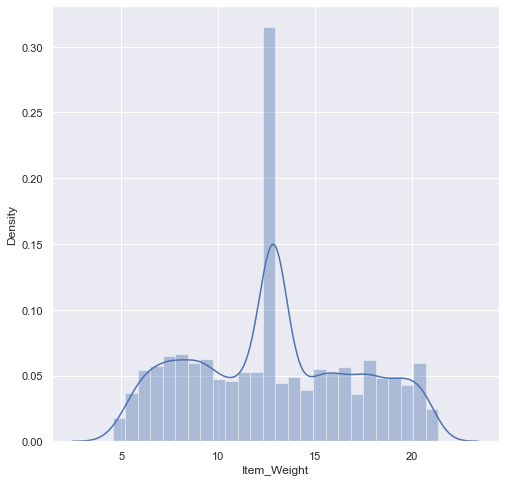

In [36]:
# Distribution of 'Item_Weight'

plt.figure(figsize = (8, 8))
sns.distplot(df['Item_Weight'])
plt.show()

* Weight of the product ranges between `5 - 20`.
* Most of the items lie between a weight of `12 - 14`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


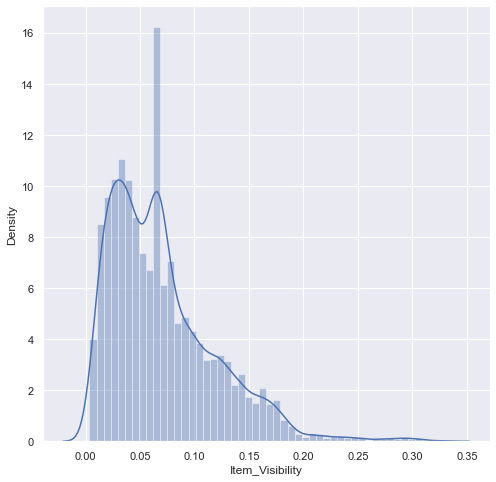

In [37]:
# Distribution of 'Item_Visibility'

plt.figure(figsize = (8, 8))
sns.distplot(df['Item_Visibility'])
plt.show()

* Visibility of an item ranges between `0 to 0.35`.
* Most of the items have a visibility between `0.01 - 0.05`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


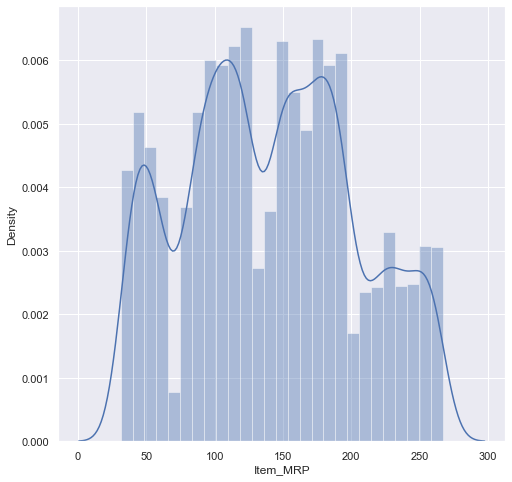

In [38]:
# Distribution of 'Item_MRP'

plt.figure(figsize = (8, 8))
sns.distplot(df['Item_MRP'])
plt.show()

* We can see `4 different categories of product` based on the MRP.
* The data is almost evenly distributed.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


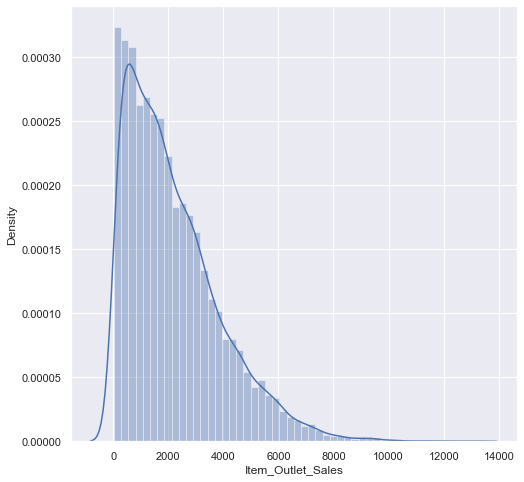

In [39]:
# Distribution of 'Item_Outlet_Sales'

plt.figure(figsize = (8, 8))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

* The plot has skewness.
* The value is ranging from 0 to 14000, which is a large range and skewness may affect the model, hence log transformation is required.

In [40]:
# Log transformation

# Adding 1 to log transformed value in order to avoid getting values as infinity
df['Item_Outlet_Sales'] = np.log(1 + df['Item_Outlet_Sales'])

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


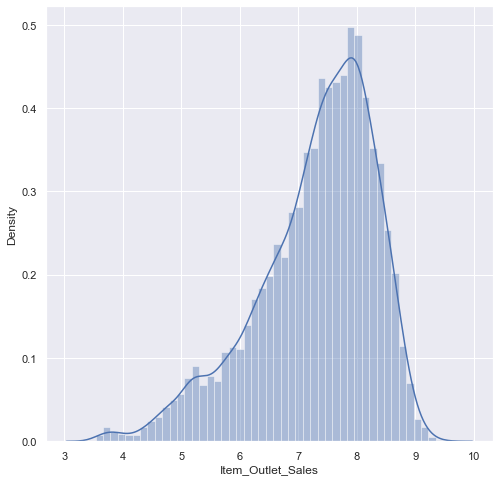

In [41]:
plt.figure(figsize = (8, 8))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

* Now, the values are ranging from `3 to 10` and can give more accurate result.
* The plot is almost evenly distributed.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


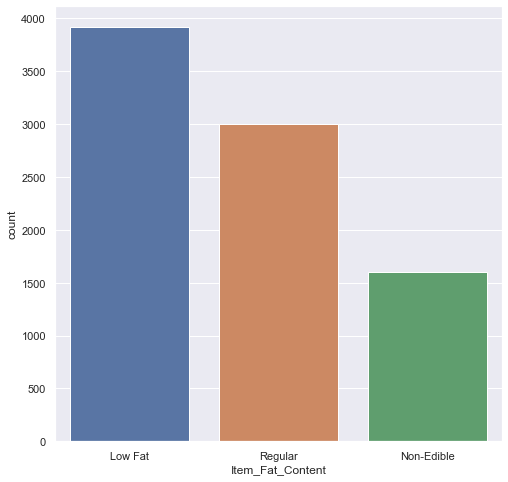

In [42]:
# Distibution of 'Item_Fat_Content'

plt.figure(figsize = (8, 8))
sns.countplot(df['Item_Fat_Content'])
plt.show()

* Most of the items have `low fat`.
* Least items are non-edible.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


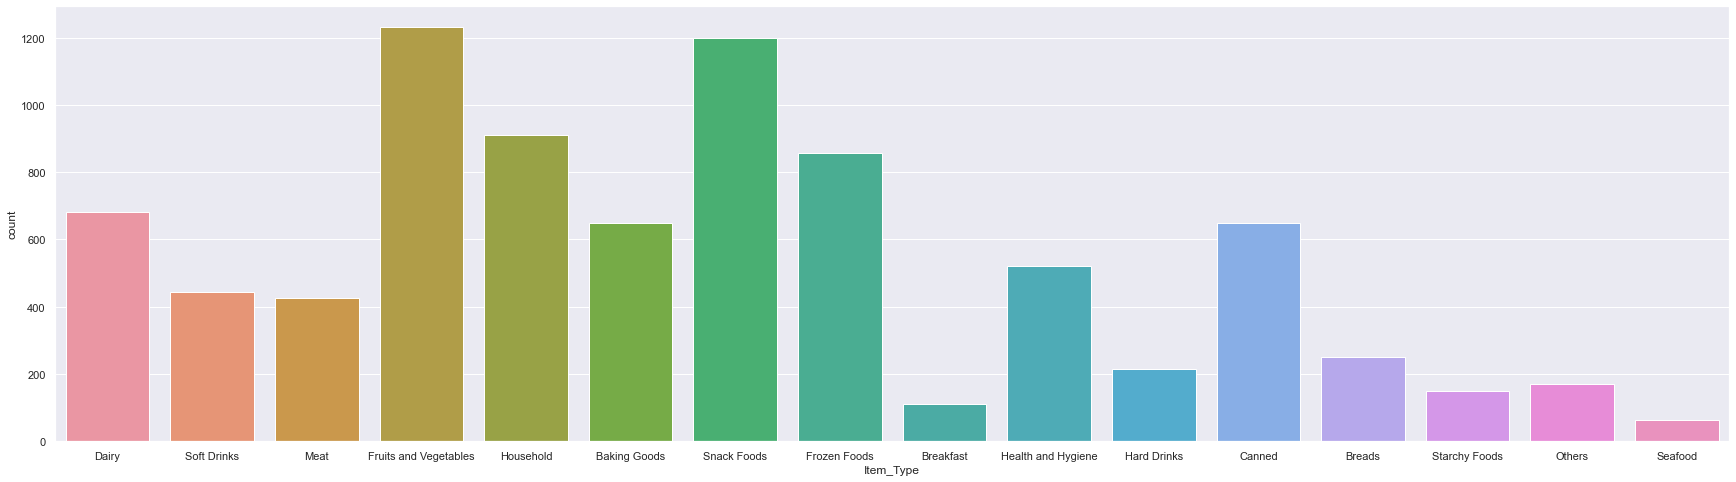

In [43]:
# Distibution of 'Item_Type'

plt.figure(figsize = (30, 8))
sns.countplot(df['Item_Type'])
plt.show()

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

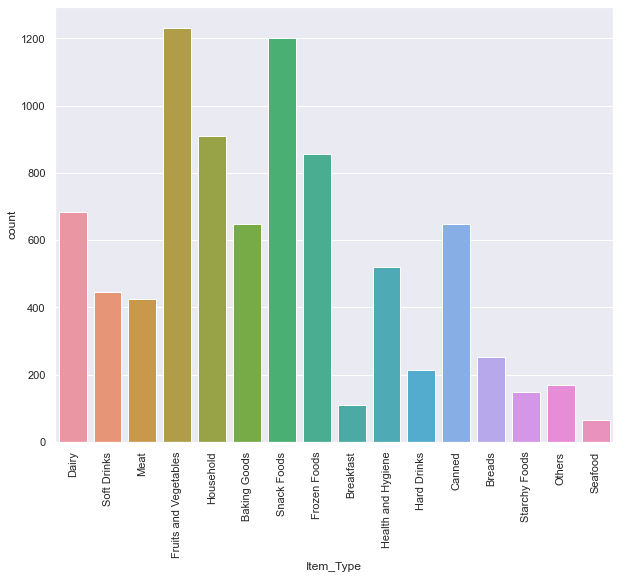

In [44]:
plt.figure(figsize = (10, 8))
l = list(df['Item_Type'].unique())
graph = sns.countplot(df['Item_Type'])
graph.set_xticklabels(labels = l, rotation = 90)

* The store has large quantity of `fruits & vegetables` along with `snacks`.
* Seafood are least in number.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


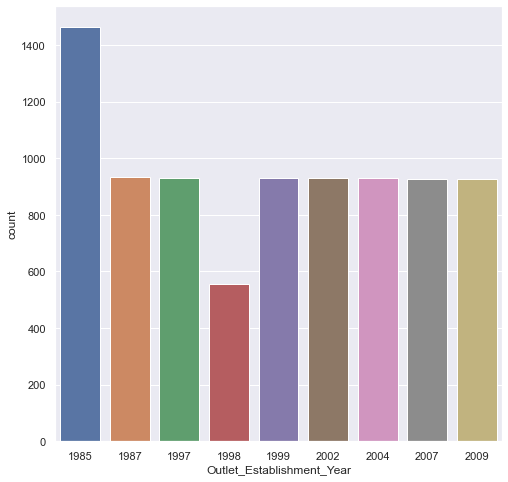

In [45]:
# Distibution of 'Outlet_Establishment_Year'

plt.figure(figsize = (8, 8))
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

* Most of the outlests were established in the year `1985`.
* Least outlets were openend in 1998.
* The remaining years had equal number of outlets established.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


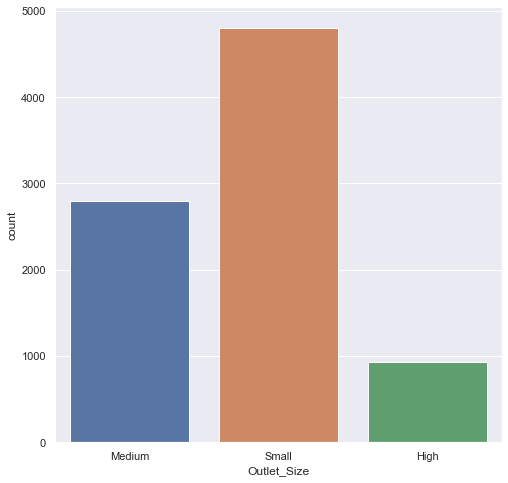

In [46]:
# Distibution of 'Outlet_Size'

plt.figure(figsize = (8, 8))
sns.countplot(df['Outlet_Size'])
plt.show()

* Most of the outlets are `small stores`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


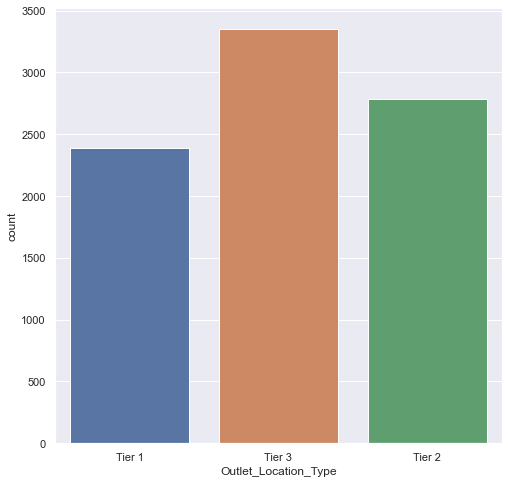

In [47]:
# Distibution of 'Outlet_Location_Type'

plt.figure(figsize = (8, 8))
sns.countplot(df['Outlet_Location_Type'])
plt.show()

* Most of the outlets are in `tier 3 location`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


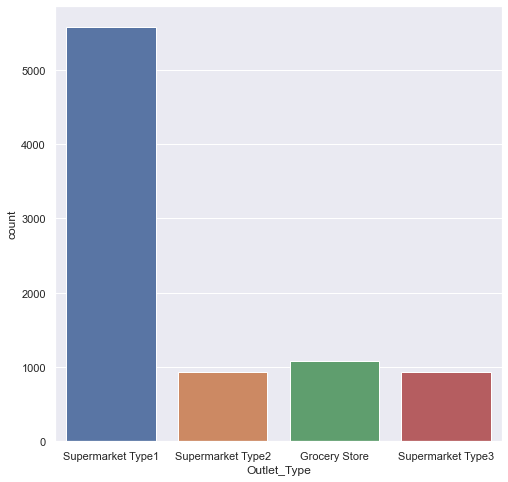

In [48]:
# Distibution of 'Outlet_Type'

plt.figure(figsize = (8, 8))
sns.countplot(df['Outlet_Type'])
plt.show()

* Most of the outlets are of `supermarket type 1`.

# Correaltion matrix

<AxesSubplot:>

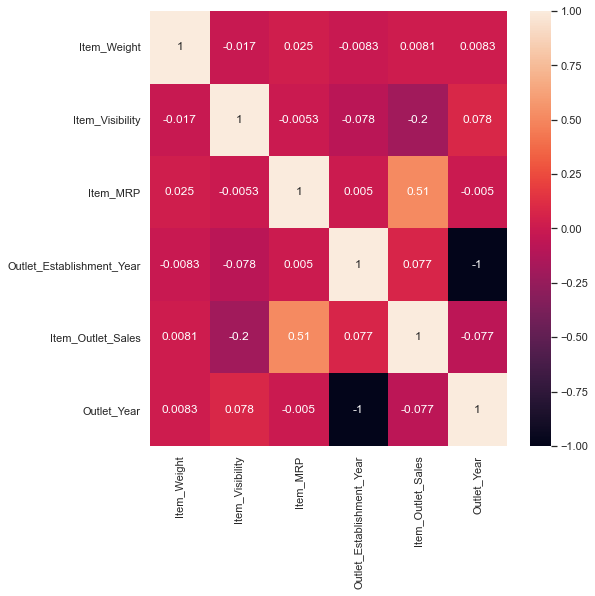

In [49]:
# Heatmap

plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)

* Correlation between Item_Establishment_Year and Outlet_Year is `-1` because Outlet_Year is derived from Item_Establishment_Year.
* Variable which is highly correlated with the target variable i.e `Item_Outlet_Sale` is `Item_MRP`.

# Encoding

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,11
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,12
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-consumable,23


### Label encoding

* `Outlet_Identifier` needs to be encoded because sales depends on outlet type based on identifier.
* All the categorical column needs to be encoded.

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encoding 'Outlet_Identifier'
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

# Encoding categorical features
cat = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'New_Item_Type']
for i in cat:
    df[i] = le.fit_transform(df[i])

In [52]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,11,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,1,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,11,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,12,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,23,1


### Onehot encoding

* Encoding all the categorical columns again based on the sub-categories.

In [53]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'New_Item_Type'])

* Haven't included `Item_Type` in onehot encoding to reduce the dimension of the dataset.

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year,Outlet,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,11,9,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,1,3,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,11,9,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,12,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,23,1,...,1,0,0,0,1,0,0,0,0,1


In [55]:
df['Item_Type'].max()

15

In [56]:
df['Outlet'][df['Outlet_Identifier'] == 'OUT046']

11      8
13      8
15      8
24      8
34      8
       ..
8450    8
8461    8
8492    8
8517    8
8522    8
Name: Outlet, Length: 930, dtype: int32

# Using dataset in model

In [57]:
pd.set_option('max_column', 22)

In [58]:
# Splitting the dataset into features and labels

x = df.drop(columns = ['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis = 1)
y = df['Item_Outlet_Sales']

In [59]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,4,249.8092,11,9,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,1,3,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,11,9,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,12,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,23,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,23,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,8,7,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,6,6,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,1,3,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [60]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [61]:
# Splitting the data for training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [62]:
print (x.shape, x_train.shape, x_test.shape)

(8523, 22) (6818, 22) (1705, 22)


## Using Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
# Creating object for the model

lr = LinearRegression(normalize = True)

#### Evaluation

In [65]:
from sklearn.metrics import r2_score

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def output(model, x, y):
    model.fit(x, y)
    pred = model.predict(x)
    acc = r2_score(y , pred)
    print ('R2 score of the model:', acc)
    
    # Calculating cross validation score
    cv = cross_val_score(model, x, y, scoring = 'neg_mean_absolute_error')
    cv = np.abs(np.mean(cv))
    
    print ('MSE of the model:', cv)

In [67]:
# For training data

output(lr, x_train, y_train)

R2 score of the model: 0.7224408416475747
MSE of the model: 0.41696504025880615


In [68]:
# For testing data

output(lr, x_test, y_test)

R2 score of the model: 0.7143608197220868
MSE of the model: 0.4263419546664681


* The difference between r2 score of training and testing data is very less, hence the model has a `good accuracy`.

## Using Ridge

In [69]:
from sklearn.linear_model import Ridge

In [70]:
# Creating object for the model

rr_1 = Ridge(normalize = True)
rr_2 = Ridge()

#### Evaluation

In [71]:
print ('Model performance with normalized data:')
print ()

# For training data
print ('For training data --')
output(rr_1, x_train, y_train)
print ()

# For testing data
print ('For testing data--')
output(rr_1, x_test, y_test)

Model performance with normalized data:

For training data --
R2 score of the model: 0.5869866931988474
MSE of the model: 0.5199215903607215

For testing data--
R2 score of the model: 0.5767433373780408
MSE of the model: 0.5252553856531987


In [72]:
print ('Model performance without normalized data:')
print ()

# For training data
print ('For training data --')
output(rr_2, x_train, y_train)
print ()

# For testing data
print ('For testing data--')
output(rr_2, x_test, y_test)

Model performance without normalized data:

For training data --
R2 score of the model: 0.7224361339573602
MSE of the model: 0.4164370542350155

For testing data--
R2 score of the model: 0.7136098633934722
MSE of the model: 0.42706538282543677


* This model performs better without normalized data and it's `accuracy is almost similar to linear regression`.

## Using Lasso

In [73]:
from sklearn.linear_model import Lasso

In [74]:
# Creating object for the model

las = Lasso()

#### Evaluation

In [75]:
# For training data

output(las, x_train, y_train)

R2 score of the model: 0.2638021329139508
MSE of the model: 0.6640958110259171


In [76]:
# For testing data

output(las, x_test, y_test)

R2 score of the model: 0.24425749463705826
MSE of the model: 0.6652156139301104


* Model is just `24%` accurate and can't be used.

## Using Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
# Creating object for the model

dt = DecisionTreeRegressor()

#### Evaluation

In [79]:
# For training data

output(dt, x_train, y_train)

R2 score of the model: 1.0
MSE of the model: 0.5859724657834497


In [80]:
# For testing data

output(dt, x_test, y_test)

R2 score of the model: 1.0
MSE of the model: 0.6137034809421766


* This model is `very accurate` but also has a `higher MSE value`.

## Using Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor 

In [82]:
# Creating object for the model

rfr = RandomForestRegressor()

#### Evaluation

In [83]:
# For training data

output(rfr, x_train, y_train)

R2 score of the model: 0.9588082763748288
MSE of the model: 0.4297220061916412


In [84]:
# For testing data

output(rfr, x_test, y_test)

R2 score of the model: 0.9567293169546741
MSE of the model: 0.44032680589503437


* The model is `highly accurate` and has a `low MSE value`. 

# Conclusion

#### Out of the 5 regression model used, `Random Forest Regressor`  and `Decision Tree Regressor`gave the maximum accuracy.

# Prediction system

#### Using Decision Tree

In [85]:
# Providing input to the system
k = int(input('Enter the index you want to check:'))
inp = x_test.iloc[k]
actual = y_test.iloc[k]

# Converting input to array
inp_arr = np.asarray(inp)

# Reshaping the array
inp_reshape = inp_arr.reshape(1, -1)

# Making prediction
pred = dt.predict(inp_reshape)

# Printing the prediction
print ('Actual value of sales:', round(np.exp(actual), 2))
print ('Predicted value for sales:', round(np.exp(pred[0]), 2))
print ('Difference:', abs(round(round(np.exp(actual), 2) - round(np.exp(pred[0]), 2), 2)))

Enter the index you want to check:205
Actual value of sales: 386.5
Predicted value for sales: 386.5
Difference: 0.0


#### Using Random Forest Regressor

In [86]:
# Providing input to the system
k = int(input('Enter the index you want to check:'))
inp = x_test.iloc[k]
actual = y_test.iloc[k]

# Converting input to array
inp_arr = np.asarray(inp)

# Reshaping the array
inp_reshape = inp_arr.reshape(1, -1)

# Making prediction
pred = rfr.predict(inp_reshape)

# Printing the prediction
print ('Actual value of sales:', round(np.exp(actual), 2))
print ('Predicted value for sales:', round(np.exp(pred[0]), 2))
print ('Difference:', abs(round(round(np.exp(actual), 2) - round(np.exp(pred[0]), 2), 2)))

Enter the index you want to check:205
Actual value of sales: 386.5
Predicted value for sales: 325.08
Difference: 61.42
